## Autopricing C2B 

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem Statement

##### The automobile industry faces the continuous challenge of accurately determining the value of used vehicles, which fluctuates based on various factors such as make, model, year, mileage, and condition. The Used Car Price Prediction Dataset, extracted from kaggle, includes 4,009 data points with nine distinct features for each vehicle listing. This project aims to develop a predictive model using this dataset to estimate the market price of used vehicles. By leveraging statistical and machine learning techniques, the model will help potential buyers and sellers in the automotive market make informed decisions by providing a reliable price estimation based on historical data and current market trends.

#### 2) Data Collection

##### Data Source -> https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset?resource=download

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [79]:
df = pd.read_csv('data/used_cars.csv')

#### Show Top 5 Records

In [80]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [12]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [13]:
[features for features in df.columns if df[features].isnull().sum() > 0]

['fuel_type', 'accident', 'clean_title']

<Axes: >

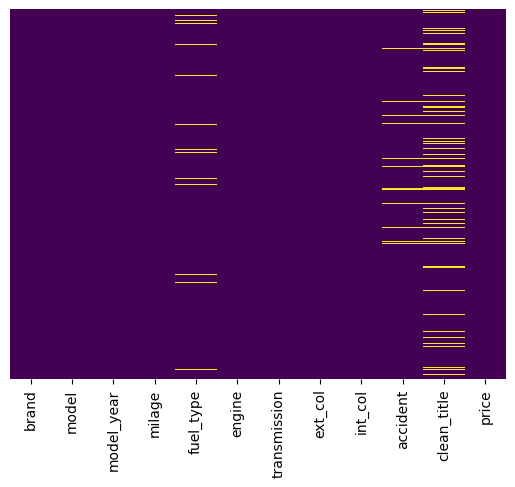

In [14]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

#### Shape of the dataset

In [16]:
df.shape

(4009, 12)

### 2.2 Dataset information

- Brand & Model: Company and specific model of each vehicle.
- Model Year: Year the vehicle was manufactured.
- Mileage: Total miles the vehicle has been driven.
- Fuel Type: Type of fuel the vehicle uses (gasoline, diesel, electric, hybrid).
- Engine Type: Specifications of the vehicle's engine.
- Transmission: Type of vehicle transmission (automatic, manual, etc.).
- Exterior & Interior Colors: Color options for the vehicle's exterior and interior.
- Accident History: Records of any past accidents or damages.
- Clean Title: Status of the vehicle’s title (clean or with issues).
- Price: Listed sale price of the vehicle.

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [17]:
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

Below are the Missing values in the dataset
- 170 missing values in fuel_type
- 113 in accident
- 596 in clean_title

### 3.2 Check Duplicates

In [18]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [19]:
# check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


### 3.4 Checking the number of unique values of each column

In [20]:
df.nunique()

brand             57
model           1898
model_year        34
milage          2818
fuel_type          7
engine          1146
transmission      62
ext_col          319
int_col          156
accident           2
clean_title        1
price           1569
dtype: int64

### 3.5 Check statistics of data set

In [21]:
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


#### Insight
- Count -> Dataset contains 4009 entries
- Mean -> The average model year of the vehicles is approximately 2015, suggesting most cars listed are recent models
- Standard Deviation (std) -> The std deviation is around 6.1 years, indicating a moderate spread in the model years of the vehicles
- Minimum (min) -> The oldest vehicle in the dataset is from the year 1974
- 25th percentile -> 25% of the vehicles are from 2012 or earlier
- Medain(50%) -> The median model year is 2017, which means half of the vehicles are from 2012 or newer
- 75th percentile -> 75% of the vehicles are from 2020 or earlier
- Maximum(max) -> The newest model year in the dataset is 2024, suggesting the inclusion of very recent or future model year vehicles

### 3.6 Preprocessing

In [22]:
# Convert 'model_year' to integer
df['model_year'] = df['model_year'].astype(int)

#Removing 'mi.' from mileage and converting to integer
df['milage'] = df['milage'].str.replace(' mi.','').str.replace(',','').astype(int)

# Removing '$' and commas from 'price' and converting to integer
df['price'] = df['price'].str.replace('$','').str.replace(',','').astype(int)

In [23]:
df.describe()

,model_year,milage,price
count,4009.000000,4009.000000,4.009000e+03
mean,2015.515590,64717.551010,4.455319e+04
std,6.104816,52296.599459,7.871064e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,23044.000000,1.720000e+04
50%,2017.000000,52775.000000,3.100000e+04
75%,2020.000000,94100.000000,4.999000e+04
max,2024.000000,405000.000000,2.954083e+06


#### Insight
Model Year:
    - Count: The dataset contains 4009 entries for vehicle model years.
    - Mean (Average) Model Year: 2015.52, indicating that on average, the vehicles are relatively recent models.
    - Standard Deviation: 6.10, suggesting a moderate spread around the mean model year.
    - Range: The oldest vehicle is from 1974, and the newest is from 2024.
    - Quartiles:
        * 25th Percentile: 2012, meaning 25% of the vehicles are from 2012 or older.
        * 50th Percentile (Median): 2017, indicating that half of the vehicles are from 2017 or newer.
        * 75th Percentile: 2020, meaning 25% of the vehicles are from 2020 or newer.

Mileage:
    - Count: There are 4009 entries for vehicle mileage.
    - Mean (Average) Mileage: 64,717.55 miles, indicating the average distance traveled by the vehicles.
    - Standard Deviation: 52,296.60 miles, suggesting a wide variation in the mileage.
    - Range: The minimum mileage is 100 miles, and the maximum is 405,000 miles.
    - Quartiles:
        * 25th Percentile: 23,044 miles, meaning 25% of the vehicles have traveled 23,044 miles or less.
        * 50th Percentile (Median): 52,775 miles, indicating that half of the vehicles have traveled 52,775 miles or less.
        * 75th Percentile: 94,100 miles, meaning 25% of the vehicles have traveled 94,100 miles or more.

Price:
    - Count: The dataset contains 4009 entries for vehicle prices.
    - Mean (Average) Price: $44,553.19, indicating the average price of the vehicles.
    - Standard Deviation: $78,710.64, suggesting a significant variation in the prices.
    - Range: The minimum price is $2,000, and the maximum price is $2,954,083.
    - Quartiles:
        * 25th Percentile: $17,200, meaning 25% of the vehicles are priced at $17,200 or less
        * 50th Percentile (Median): $31,000, indicating that half of the vehicles are priced at $31,000 or less.
        * 75th Percentile: $49,990, meaning 25% of the vehicles are priced at $49,990 or more.

### 3.7 Exploring Data

In [24]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [25]:
print("Categories in 'brand' variable: ", end = " ")
print(df['brand'].unique())

Categories in 'brand' variable:  ['Ford' 'Hyundai' 'Lexus' 'INFINITI' 'Audi' 'Acura' 'BMW' 'Tesla' 'Land'
 'Aston' 'Toyota' 'Lincoln' 'Jaguar' 'Mercedes-Benz' 'Dodge' 'Nissan'
 'Genesis' 'Chevrolet' 'Kia' 'Jeep' 'Bentley' 'Honda' 'Lucid' 'MINI'
 'Porsche' 'Hummer' 'Chrysler' 'Volvo' 'Cadillac' 'Lamborghini' 'Maserati'
 'Volkswagen' 'Subaru' 'Rivian' 'GMC' 'RAM' 'Alfa' 'Ferrari' 'Scion'
 'Mitsubishi' 'Mazda' 'Saturn' 'Bugatti' 'Polestar' 'Rolls-Royce'
 'McLaren' 'Buick' 'Lotus' 'Pontiac' 'FIAT' 'Karma' 'Saab' 'Mercury'
 'Plymouth' 'smart' 'Maybach' 'Suzuki']


In [26]:
print("Categories in 'Model' varaible : ", end= " ")
print(df['model'].unique())

Categories in 'Model' varaible :  ['Utility Police Interceptor Base' 'Palisade SEL' 'RX 350 RX 350' ...
 'Martin DB7 Vantage Volante' 'Impala 2LZ' 'Taycan']


In [27]:
print("Categories in 'Model year' varaible : ", end = " ")
print(df['model_year'].unique())

Categories in 'Model year' varaible :  [2013 2021 2022 2015 2016 2017 2001 2020 2019 2003 2018 2023 2000 2006
 2011 2012 2007 2014 2005 2009 2010 2004 2008 1997 1999 1993 2002 1998
 2024 1996 1974 1992 1995 1994]


In [28]:
print("Categories in 'Fuel type' varaible : ", end = " ")
print(df['fuel_type'].unique())

Categories in 'Fuel type' varaible :  ['E85 Flex Fuel' 'Gasoline' 'Hybrid' nan 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']


In [29]:
print("Categories in 'Engine' varaible : ", end= " ")
print(df['engine'].unique())

Categories in 'Engine' varaible :  ['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability'
 '3.8L V6 24V GDI DOHC' '3.5 Liter DOHC' ...
 '136.0HP 1.8L 4 Cylinder Engine Gasoline Fuel'
 '270.0HP 2.0L 4 Cylinder Engine Gasoline Fuel'
 '420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel']


In [30]:
print("Categories in 'Transmission' varaible : ", end = " ")
print(df['transmission'].unique())

Categories in 'Transmission' varaible :  ['6-Speed A/T' '8-Speed Automatic' 'Automatic' '7-Speed A/T' 'F' 'A/T'
 '8-Speed A/T' 'Transmission w/Dual Shift Mode' '9-Speed Automatic'
 '6-Speed M/T' '10-Speed A/T' '9-Speed A/T' '5-Speed A/T' '1-Speed A/T'
 'Automatic CVT' '7-Speed Automatic with Auto-Shift' 'CVT-F' 'M/T'
 '6-Speed Automatic with Auto-Shift' '10-Speed Automatic'
 'CVT Transmission' '4-Speed A/T' '6-Speed Automatic' '4-Speed Automatic'
 '7-Speed M/T' '8-Speed Automatic with Auto-Shift' '5-Speed Automatic'
 '8-SPEED AT' '1-Speed Automatic' '5-Speed M/T' 'Manual' '6-Speed Manual'
 'Variable' '2' '7-Speed Manual' 'Automatic, 9-Spd 9G-Tronic'
 'Automatic, 8-Spd' 'Automatic, 8-Spd Sport w/Sport & Manual Modes' '–'
 'Auto, 6-Spd w/CmdShft' 'Transmission Overdrive Switch'
 '7-Speed Automatic' 'Automatic, 8-Spd PDK Dual-Clutch'
 'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes'
 'Automatic, 8-Spd Dual-Clutch' '6-Speed' 'Single-Speed Fixed Gear'
 'Automatic, 10-Spd' 

In [31]:
print("Categories in 'exterior color' variable : ", end = " ")
print(df['ext_col'].unique())

Categories in 'exterior color' variable :  ['Black' 'Moonlight Cloud' 'Blue' 'Glacier White Metallic' 'Silver'
 'Green' 'Fuji White' 'Yellow' 'White' 'Gray' 'Purple'
 'Iconic Silver Metallic' 'Mythos Black Metallic' 'Red' 'Gold'
 'Lunar Silver Metallic' 'Mountain Air Metallic' 'Caspian Blue'
 'Tango Red Metallic' '–' 'Alpine White' 'BLU ELEOS' 'Horizon Blue'
 'Granite Crystal Clearcoat Metallic' 'Orange' 'Beige' 'Rift Metallic'
 'Atomic Silver' 'Summit White' 'Imperial Blue Metallic'
 'Magnetic Gray Clearcoat' 'Bright White Clearcoat' 'Typhoon Gray'
 'Crystal Black Silica' 'Arctic Gray Metallic' 'Selenite Grey Metallic'
 'Ultra Black' 'Lunare White Metallic' 'Hyper Red'
 'Daytona Gray Pearl Effect' 'Vik Black' 'Pacific Blue Metallic'
 'Obsidian Black Metallic' 'Silver Ice Metallic' 'Sonic Silver Metallic'
 'Nightfall Mica' 'Apex Blue' 'Go Mango!' 'Ingot Silver Metallic'
 'Midnight Black Metallic' 'Black Clearcoat' 'Thunder Gray'
 'Bianco Monocerus' 'Verde' 'Wind Chill Pearl' 'Mythos Bl

In [32]:
print("Categories in 'interior color' variable : ", end = " ")
print(df['int_col'].unique())

Categories in 'interior color' variable :  ['Black' 'Gray' 'Ebony.' 'Green' 'Pimento / Ebony' 'Brown' 'White' '–'
 'Beige' 'Jet Black' 'Light Gray' 'Anthracite' 'Red' 'Nero Ade' 'Blue'
 'Charcoal' 'Rioja Red' 'Canberra Beige/Black' 'Roast' 'Ivory / Ebony'
 'Silk Beige/Black' 'Medium Pewter' 'Ice' 'Black / Express Red'
 'Obsidian Black' 'Ebony' 'Orange' 'Caramel' 'Orchid' 'Graphite'
 'Tan/Ebony' 'Cappuccino' 'Nero' 'Sahara Tan' 'BLACK' 'Hotspur' 'Blk'
 'Black Onyx' 'Nougat Brown' 'Titan Black' 'Oyster W/Contrast' 'Silver'
 'Macchiato Beige/Black' 'Sand Beige' 'Navy Pier' 'WHITE' 'Parchment.'
 'Sarder Brown' 'Grace White' 'Cloud' 'Espresso' 'Mesa' 'Whisper Beige'
 'Medium Dark Slate' 'Gold' 'Camel Leather' 'Tupelo' 'Black/Red'
 'Parchment' 'Beluga Hide' 'Charles Blue' 'Global Black'
 'Titan Black / Quarzit' 'Mocha' 'Portland' 'Medium Light Camel'
 'Black / Saddle' 'Ash' 'Ebony / Pimento' 'Tan' 'Mistral Gray / Raven'
 'Graystone' 'Satin Black' 'Sandstone' 'Medium Stone' 'ORANGE'
 'Pimento

In [33]:
print("Categories in 'Accident history' variable : ", end = " ")
print(df['accident'].unique())

Categories in 'Accident history' variable :  ['At least 1 accident or damage reported' 'None reported' nan]


In [34]:
print("Categories in 'clean title' variable : ", end = " ")
print(df['clean_title'].unique)

Categories in 'clean title' variable :  <bound method Series.unique of 0       Yes
1       Yes
2       NaN
3       Yes
4       NaN
       ... 
4004    Yes
4005    Yes
4006    NaN
4007    Yes
4008    Yes
Name: clean_title, Length: 4009, dtype: object>


In [35]:
# Define numerical and categorical column
numeric_features = [feature for feature in df.columns if df[feature].dtype in ['int64', 'float64']]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object' or df[feature].dtype == 'category']


# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['model_year', 'milage', 'price']

We have 9 categorical features : ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [36]:
most_common_fuel = df['fuel_type'].mode()[0]

print("The most common fuel type is :", most_common_fuel)

#filling missing values with the most common fuel type
df['fuel_type'] = df['fuel_type'].fillna(most_common_fuel)

print("Missing values in 'fuel_type' after imputation:", df['fuel_type'].isnull().sum())
print(df['fuel_type'].value_counts())

The most common fuel type is : Gasoline
Missing values in 'fuel_type' after imputation: 0
fuel_type
Gasoline          3479
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64


In [37]:
df['accident'].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [38]:
# Fill missing values in fuel_type with mode
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])

# Fill missing values in accident with 'No'
df['accident'] = df['accident'].fillna('No')

# Indicator for missing clean_title
df['clean_title_missing'] = df['clean_title'].isnull().astype(int)

# Fill missing values in clean_title with 'Unknown'
df['clean_title'] = df['clean_title'].fillna('Unknown')

In [39]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,clean_title_missing
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,0
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005,0
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,54598,1
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500,0
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,34999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950,0
4005,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900,0
4006,Porsche,Taycan,2022,2116,Gasoline,Electric,Automatic,Black,Black,None reported,Unknown,90998,1
4007,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999,0


In [40]:
print(df.columns)

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'clean_title_missing'],
      dtype='object')


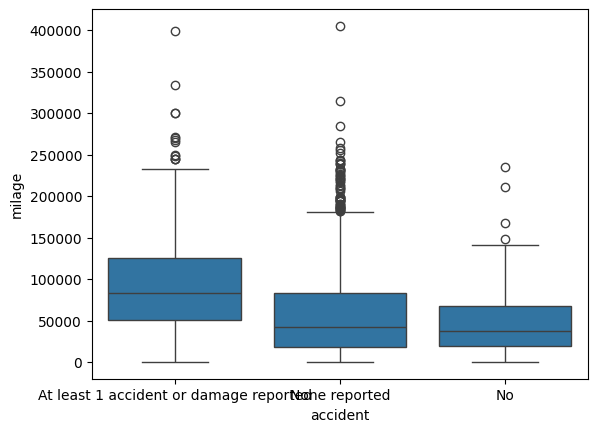

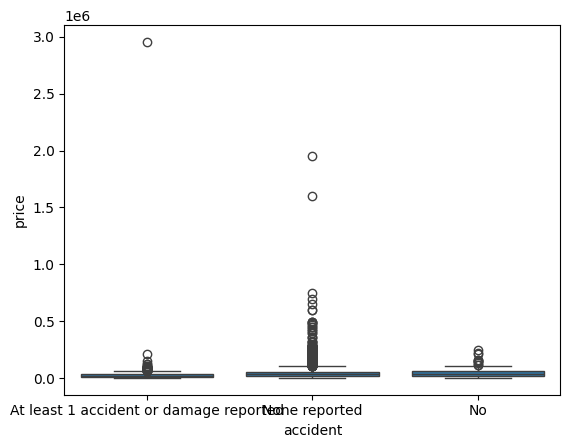

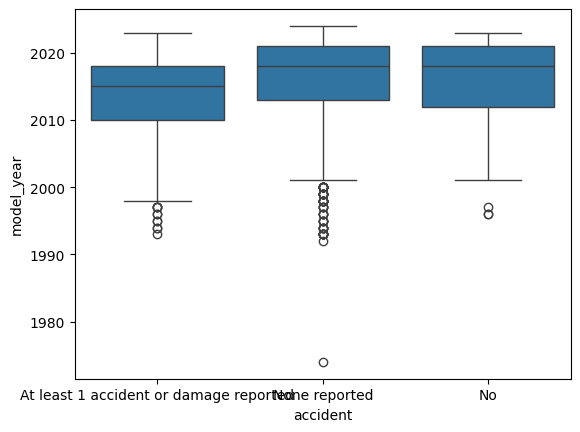

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for mileage vs accident
sns.boxplot(x='accident', y='milage', data=df)
plt.show()

# Box plot for price vs accident
sns.boxplot(x='accident', y='price', data=df)
plt.show()

# Box plot for model_year vs accident
sns.boxplot(x='accident', y='model_year', data=df)
plt.show()


In [42]:
df['milage'].dtype

dtype('int64')

#### 1. Calculate Vehicle Age from Model Year

In [43]:
current_year = 2024
df['vehicle_age'] = current_year - df['model_year']

#### 2. Create Mileage Bins

In [44]:
bins = [0, 50000, 100000, 150000, 200000, np.inf]
labels = ['<50k','50k-100k','100k-150k','150k-200k','>200k']
df['milage_bin'] = pd.cut(df['milage'], bins=bins, labels=labels)

#### 3. Combine Brand and Model

In [45]:
df['brand_model'] = df['brand'] + '_' + df['model']

In [46]:
df.isnull().sum()

brand                  0
model                  0
model_year             0
milage                 0
fuel_type              0
engine                 0
transmission           0
ext_col                0
int_col                0
accident               0
clean_title            0
price                  0
clean_title_missing    0
vehicle_age            0
milage_bin             0
brand_model            0
dtype: int64

In [47]:
df['accident'].size

4009

In [48]:
df['clean_title'].head()

0        Yes
1        Yes
2    Unknown
3        Yes
4    Unknown
Name: clean_title, dtype: object

In [49]:
accident_non_missing = df['accident'].count()
clean_title_non_missing = df['clean_title'].count()

In [50]:
print("accident_non_missing = ",accident_non_missing)
print("clean_title_non_missing = ", clean_title_non_missing)

accident_non_missing =  4009
clean_title_non_missing =  4009


Text(0.5, 1.0, 'Distribution of Clean Title Status by Accident History')

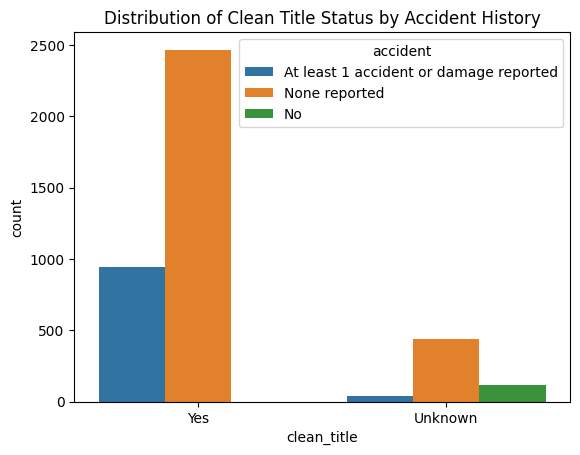

In [51]:
sns.countplot(x='clean_title',hue='accident',data=df)
plt.title('Distribution of Clean Title Status by Accident History')

### Distribution of target variables

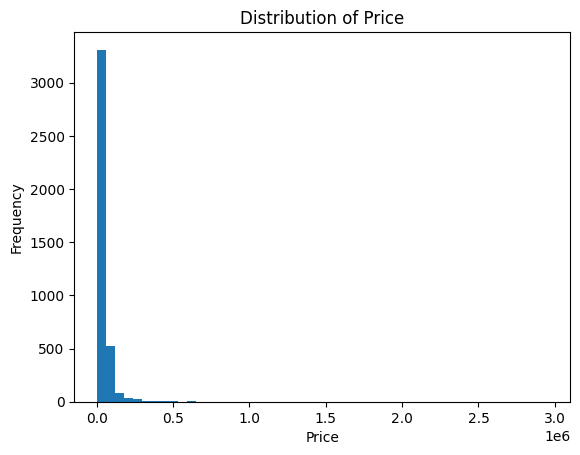

In [52]:
import matplotlib.pyplot as plt

# Plot histogram of the target variable
plt.hist(df['price'], bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


The histogram of price shows a heavy right-skew, indicating a few very high prices while most of the prices are relatively low.

In [55]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(df['price'])
print(f'Skewness of Price: {skewness}')


Skewness of Price: 19.50624929114917


Heavy skewness observed in the histogram.

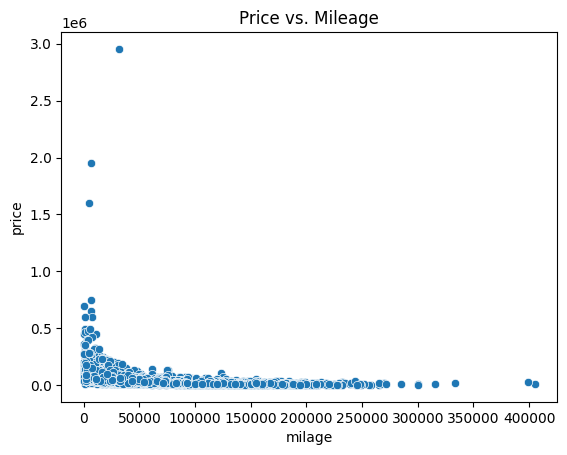

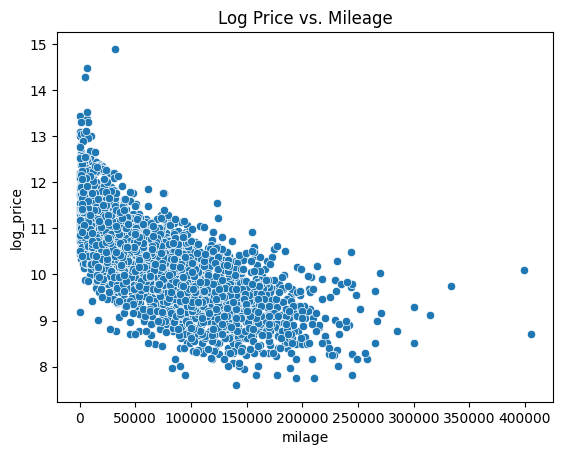

In [56]:
import seaborn as sns

# Scatter plot of price vs. mileage
sns.scatterplot(x='milage', y='price', data=df)
plt.title('Price vs. Mileage')
plt.show()

# Scatter plot of log_price vs. mileage
df['log_price'] = np.log(df['price'])
sns.scatterplot(x='milage', y='log_price', data=df)
plt.title('Log Price vs. Mileage')
plt.show()


Price vs. Mileage: The scatter plot shows that as mileage increases, the price tends to decrease. However, the data points are highly concentrated near lower prices with some very high values causing outliers.

Log Price vs. Mileage: The scatter plot of log_price vs. mileage shows a clearer and more linear relationship. The log transformation reduces the skewness and compresses the range of high prices, making the relationship more apparent.

### Univariate Analysis

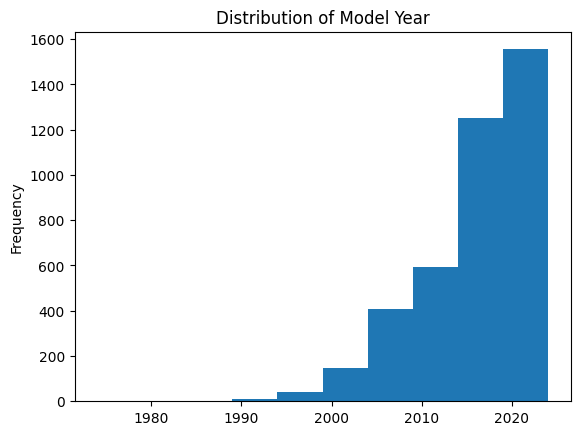

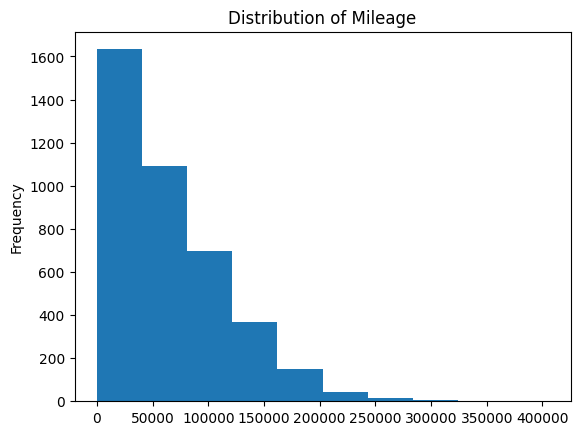

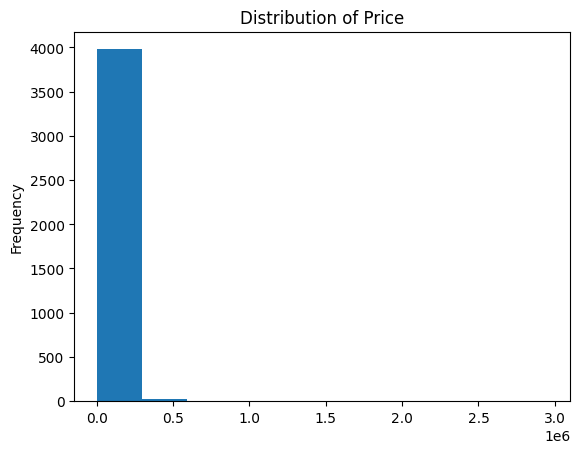

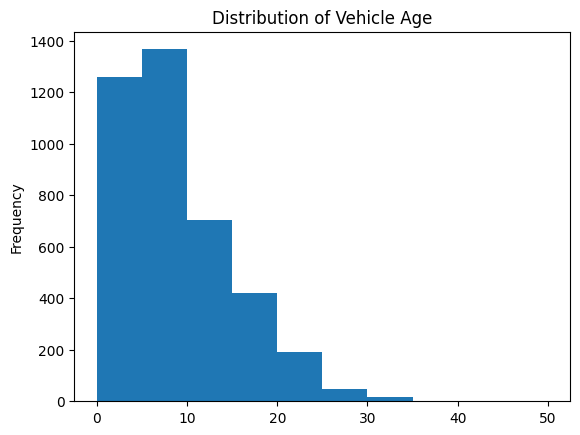

In [57]:
# Distribution of Numerical Features
df['model_year'].plot(kind='hist', title='Distribution of Model Year')
plt.show()
df['milage'].plot(kind='hist', title='Distribution of Mileage')
plt.show()
df['price'].plot(kind='hist', title='Distribution of Price')
plt.show()
df['vehicle_age'].plot(kind='hist', title='Distribution of Vehicle Age')
plt.show()

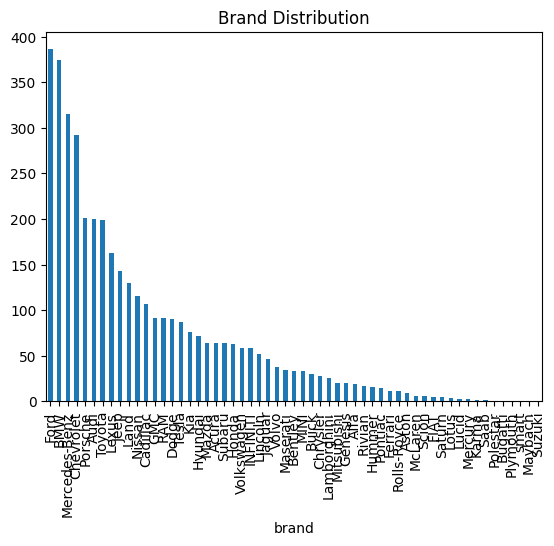

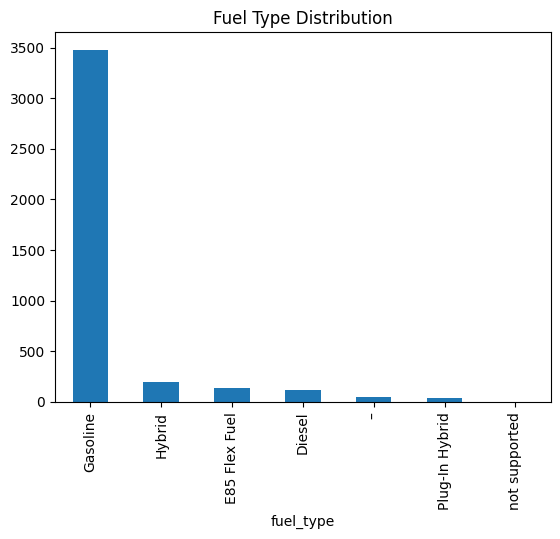

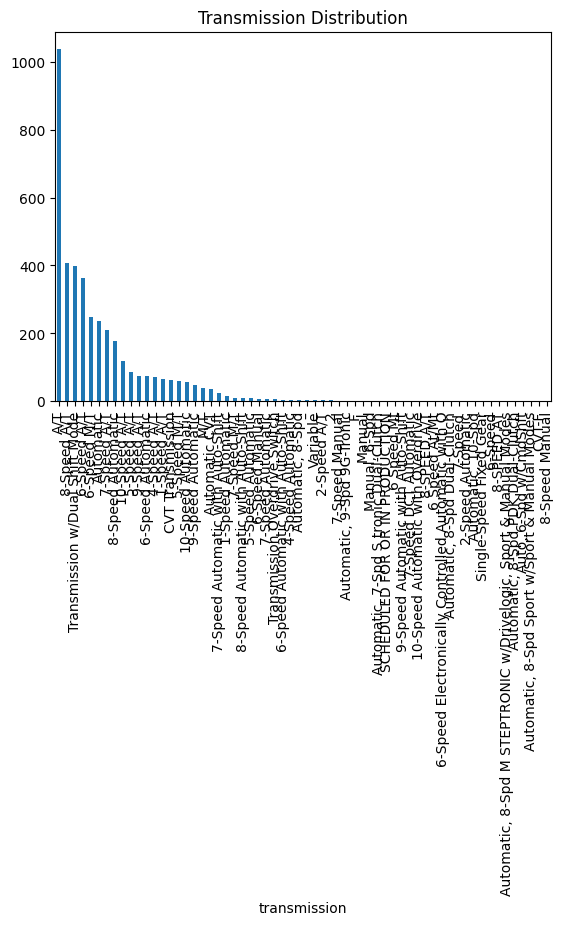

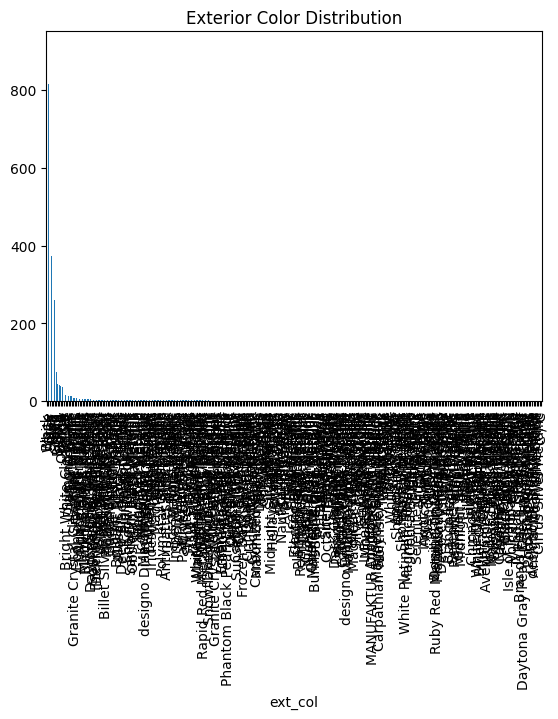

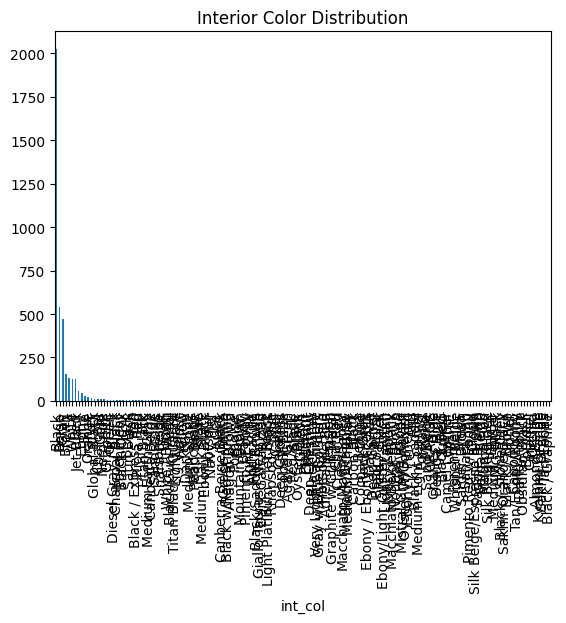

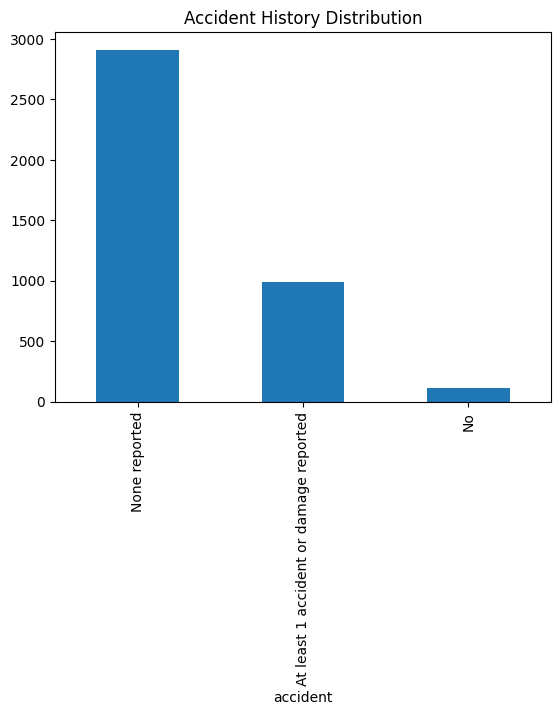

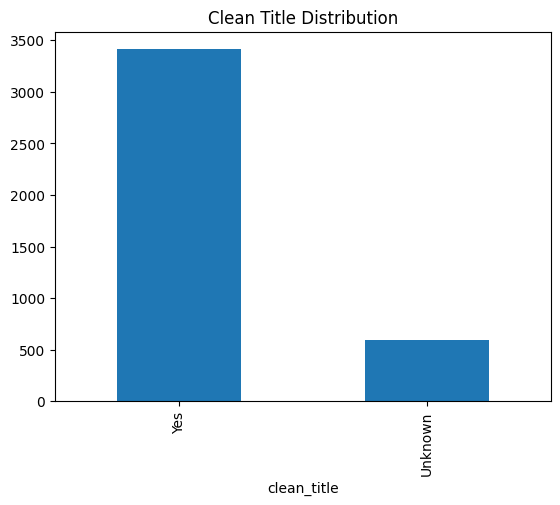

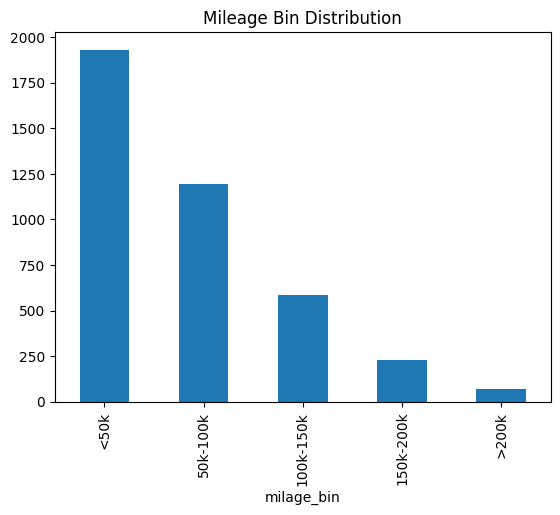

In [58]:
# Distribution of Categorical Features
df['brand'].value_counts().plot(kind='bar', title='Brand Distribution')
plt.show()
df['fuel_type'].value_counts().plot(kind='bar', title='Fuel Type Distribution')
plt.show()
df['transmission'].value_counts().plot(kind='bar', title='Transmission Distribution')
plt.show()
df['ext_col'].value_counts().plot(kind='bar', title='Exterior Color Distribution')
plt.show()
df['int_col'].value_counts().plot(kind='bar', title='Interior Color Distribution')
plt.show()
df['accident'].value_counts().plot(kind='bar', title='Accident History Distribution')
plt.show()
df['clean_title'].value_counts().plot(kind='bar', title='Clean Title Distribution')
plt.show()
df['milage_bin'].value_counts().plot(kind='bar', title='Mileage Bin Distribution')
plt.show()


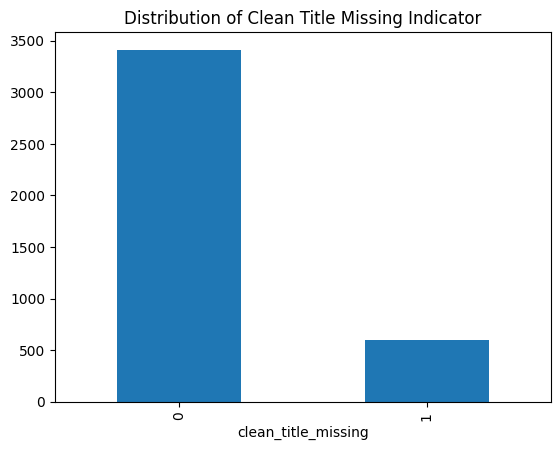

In [59]:
df['clean_title_missing'].value_counts().plot(kind='bar', title='Distribution of Clean Title Missing Indicator')
plt.show()

The plot indicates that a significant majority of the records have clean_title information available (clean_title_missing = 0).

A smaller proportion of records have missing clean_title information (clean_title_missing = 1).

### Bivariate Analysis

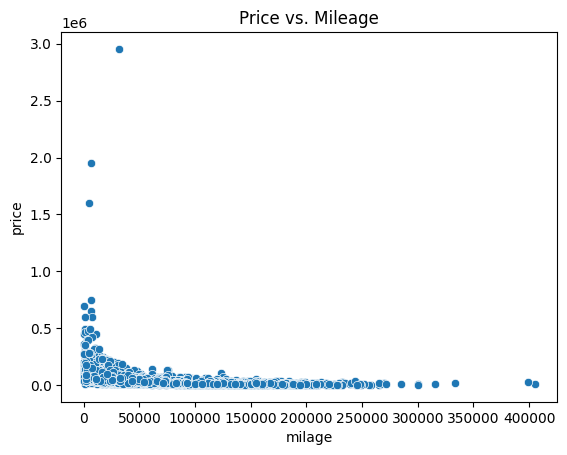

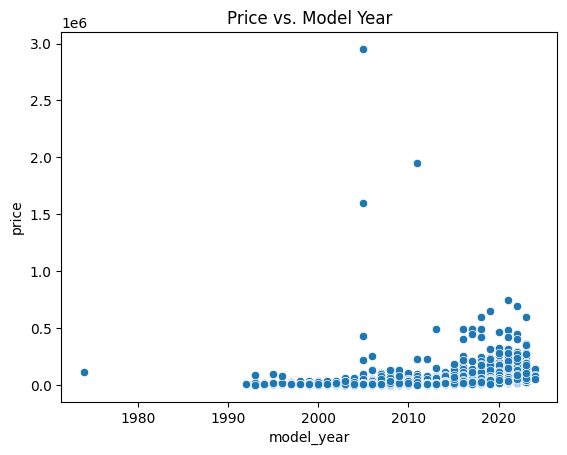

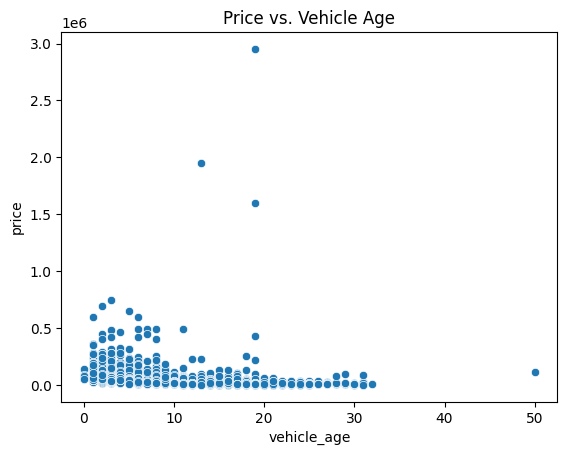

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical vs. Numerical
sns.scatterplot(x='milage', y='price', data=df)
plt.title('Price vs. Mileage')
plt.show()

sns.scatterplot(x='model_year', y='price', data=df)
plt.title('Price vs. Model Year')
plt.show()

sns.scatterplot(x='vehicle_age', y='price', data=df)
plt.title('Price vs. Vehicle Age')
plt.show()

#### Price vs. Mileage
    As mileage increases, the price of the vehicle decreases.
    Vehicles with higher mileage tend to have lower prices, which is expected as higher mileage usually indicates more wear and tear.

####  Price vs. Model Year
    Newer model years correspond to higher prices
    Older vehicles tend to have lower prices

#### Price vs. Vehicle Age
    As the vehicle age increases, the price tends to decrease
    

#### Feature Engineering

Interaction between model_year and milage might reveal how the effect of mileage on price changes with the model year.

In [61]:
# Creating an interaction term between model_year and milage
df['model_year_milage'] = df['model_year'] * df['milage']

Log-transforming the price can help handle skewness in the target variable, which often leads to better model performance.

In [62]:
# Log-transform the price
df['log_price'] = np.log(df['price'])

### Bivariate Analysis

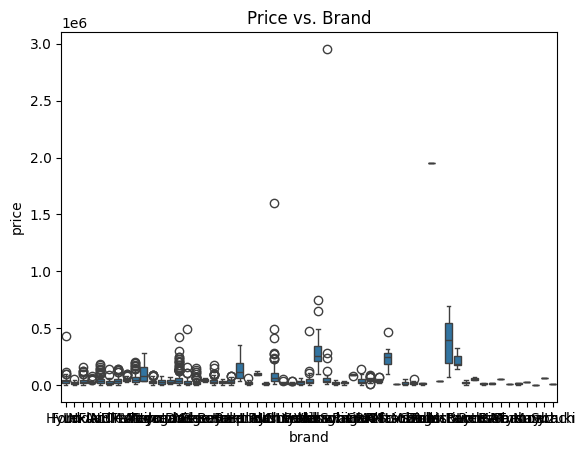

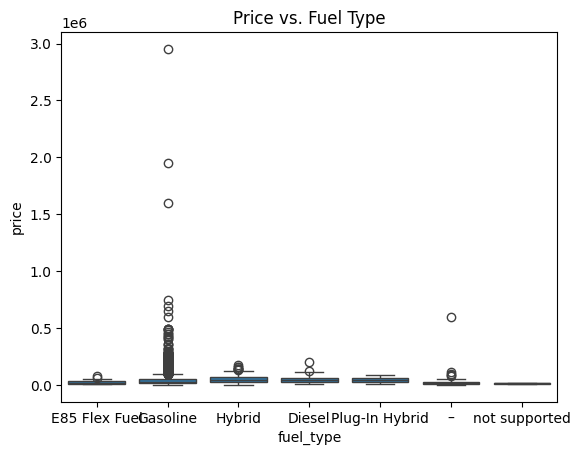

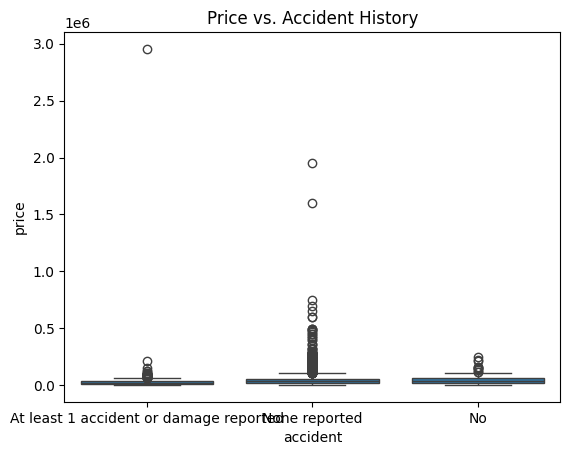

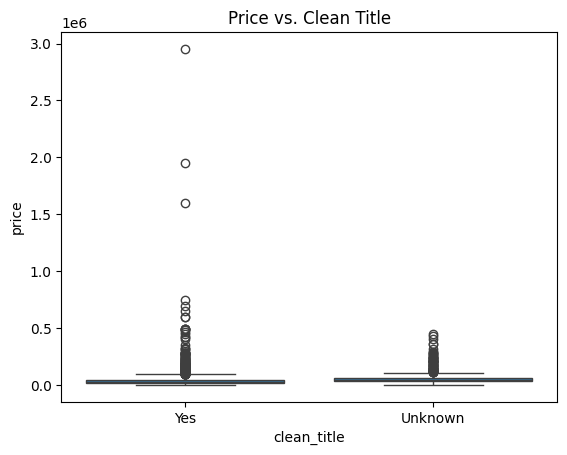

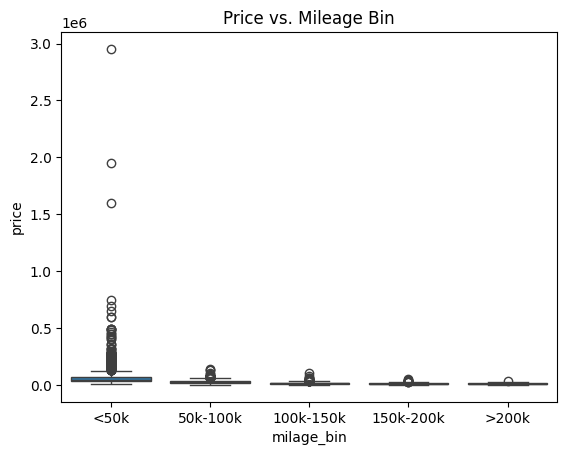

In [63]:
# Categorical vs. Numerical
sns.boxplot(x='brand', y='price', data=df)
plt.title('Price vs. Brand')
plt.show()

sns.boxplot(x='fuel_type', y='price', data=df)
plt.title('Price vs. Fuel Type')
plt.show()

sns.boxplot(x='accident', y='price', data=df)
plt.title('Price vs. Accident History')
plt.show()

sns.boxplot(x='clean_title', y='price', data=df)
plt.title('Price vs. Clean Title')
plt.show()

sns.boxplot(x='milage_bin', y='price', data=df)
plt.title('Price vs. Mileage Bin')
plt.show()

#### Price vs. Brand
    The prices vary significantly across different brands.
    Brand is a significant factor in determining the price of a car.
    Luxury and high-end brands generally have higher prices

#### Price vs. Fuel Type
    Gasoline cars have a wide range of prices
    Other fuel types show lower prices on average

#### Price vs. Accident History
    Accident history negatively impacts the price of a car.
    Cars with no reported accidents generally have higher prices.
    Cars with at least one accident or damage reported show a lower median price
    Buyers are willing to pay more for cars with no accident history.

#### Price vs. Clean Title
    Cars with a clean title have higher prices.
    A clean title is a positive indicator for higher car prices.
    This indicates that a clean title is associated with better condition and higher value.
    Cars without clean titles may be significantly cheaper due to potential issues or buyer concerns.

#### Price vs. Mileage Bin
    Cars with mileage less than 50k have higher prices.
    Lower mileage is associated with higher car prices, as expected due to less wear and tear.
    Higher mileage cars tend to be cheaper, reflecting their use and potential need for maintenance.

### Feature Engineering

In [64]:
#Interaction between brand and model_year: Captures brand-specific depreciation patterns over time.
df['brand_model_year'] = df['brand'] + '_' + df['model_year'].astype(str)

In [65]:
#Interaction between brand and milage: Reflects how different brands' values are affected by mileage.
df['brand_milage'] = df['brand'] + '_' + df['milage'].astype(str)

In [66]:
#Interaction between fuel_type and milage: Shows how mileage impacts prices differently based on the type of fuel.
df['fuel_type_milage'] = df['fuel_type'] + '_' + df['milage'].astype(str)

#### Bivariate Analysis

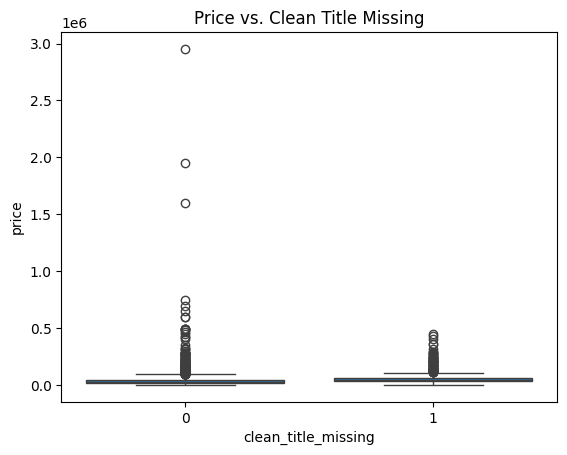

In [67]:
# Price vs. Clean Title Missing
sns.boxplot(x='clean_title_missing', y='price', data=df)
plt.title('Price vs. Clean Title Missing')
plt.show()

The box plot indicates that there is no significant difference in the distribution of prices between cars with and without missing clean_title information. Both distributions have a similar range and median price.

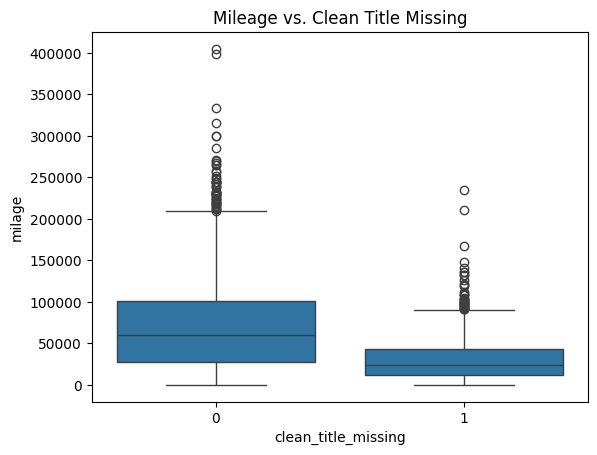

In [68]:
# Mileage vs. Clean Title Missing
sns.boxplot(x='clean_title_missing', y='milage', data=df)
plt.title('Mileage vs. Clean Title Missing')
plt.show()

Cars with missing clean_title information (1) tend to have lower mileage compared to those with clean_title information present (0).

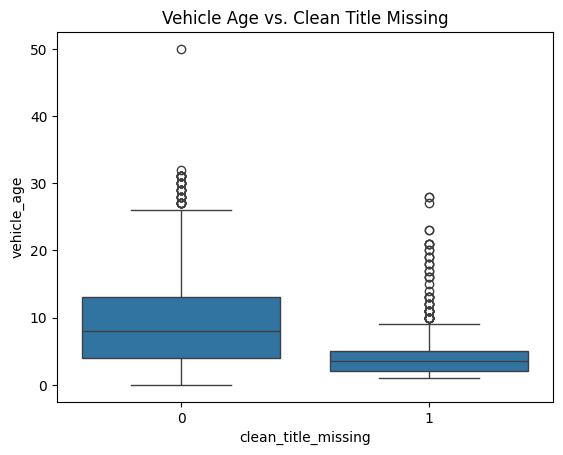

In [69]:
#Vehicle Age vs. Clean Title Missing
sns.boxplot(x='clean_title_missing', y='vehicle_age', data=df)
plt.title('Vehicle Age vs. Clean Title Missing')
plt.show()

Cars with missing clean_title information (1) are generally newer (lower vehicle age) than those with clean_title information present (0).

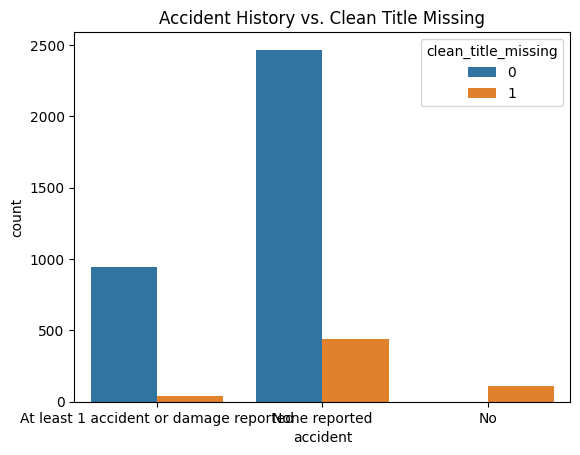

In [70]:
#Accident History vs. Clean Title Missing
sns.countplot(x='accident', hue='clean_title_missing', data=df)
plt.title('Accident History vs. Clean Title Missing')
plt.show()

The majority of cars with missing clean_title information (1) have no reported accidents.

### Feature engineering

In [71]:
df['brand_clean_title_missing'] = df['brand'] + '_' + df['clean_title_missing'].astype(str)
df['fuel_type_clean_title_missing'] = df['fuel_type'] + '_' + df['clean_title_missing'].astype(str)
df['accident_clean_title_missing'] = df['accident'] + '_' + df['clean_title_missing'].astype(str)

In [72]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,milage_bin,brand_model,log_price,model_year_milage,brand_model_year,brand_milage,fuel_type_milage,brand_clean_title_missing,fuel_type_clean_title_missing,accident_clean_title_missing
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,50k-100k,Ford_Utility Police Interceptor Base,9.239899,102663000,Ford_2013,Ford_51000,E85 Flex Fuel_51000,Ford_0,E85 Flex Fuel_0,At least 1 accident or damage reported_0
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,<50k,Hyundai_Palisade SEL,10.545473,70213582,Hyundai_2021,Hyundai_34742,Gasoline_34742,Hyundai_0,Gasoline_0,At least 1 accident or damage reported_0
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,<50k,Lexus_RX 350 RX 350,10.907753,45236184,Lexus_2022,Lexus_22372,Gasoline_22372,Lexus_1,Gasoline_1,None reported_1
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,50k-100k,INFINITI_Q50 Hybrid Sport,9.648595,179133500,INFINITI_2015,INFINITI_88900,Hybrid_88900,INFINITI_0,Hybrid_0,None reported_0
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,<50k,Audi_Q3 45 S line Premium Plus,10.463075,19876535,Audi_2021,Audi_9835,Gasoline_9835,Audi_1,Gasoline_1,None reported_1


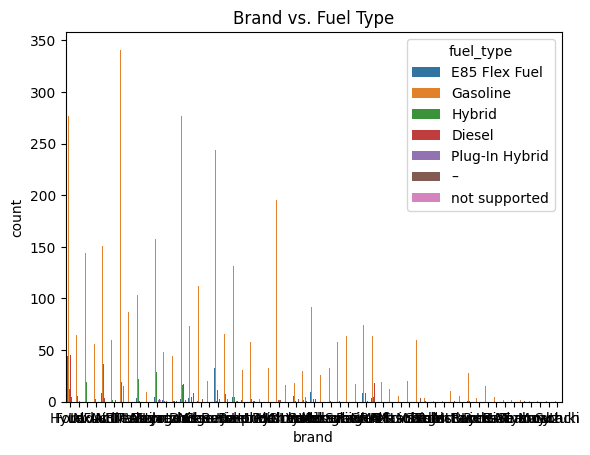

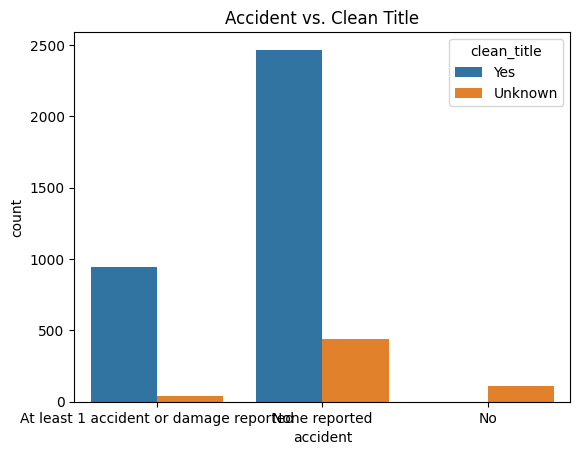

In [73]:
# Categorical vs. Categorical
sns.countplot(x='brand', hue='fuel_type', data=df)
plt.title('Brand vs. Fuel Type')
plt.show()

sns.countplot(x='accident', hue='clean_title', data=df)
plt.title('Accident vs. Clean Title')
plt.show()


Brand vs. Fuel Type

    Highlights the relationship between car brands and their predominant fuel types.
    Interaction terms between brand and fuel_type can capture this relationship, potentially improving model accuracy.

Accident vs. Clean Title

    Shows the correlation between accident history and clean title status.
    Including both features and their interaction terms can help the model understand their combined effect on car prices.

#### Feature Engineering

In [74]:
df['brand_fuel_type'] = df['brand'] + '_' + df['fuel_type']
df['accident_clean_title'] = df['accident'] + '_' + df['clean_title']

In [75]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,log_price,model_year_milage,brand_model_year,brand_milage,fuel_type_milage,brand_clean_title_missing,fuel_type_clean_title_missing,accident_clean_title_missing,brand_fuel_type,accident_clean_title
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,9.239899,102663000,Ford_2013,Ford_51000,E85 Flex Fuel_51000,Ford_0,E85 Flex Fuel_0,At least 1 accident or damage reported_0,Ford_E85 Flex Fuel,At least 1 accident or damage reported_Yes
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,10.545473,70213582,Hyundai_2021,Hyundai_34742,Gasoline_34742,Hyundai_0,Gasoline_0,At least 1 accident or damage reported_0,Hyundai_Gasoline,At least 1 accident or damage reported_Yes
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,10.907753,45236184,Lexus_2022,Lexus_22372,Gasoline_22372,Lexus_1,Gasoline_1,None reported_1,Lexus_Gasoline,None reported_Unknown
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,9.648595,179133500,INFINITI_2015,INFINITI_88900,Hybrid_88900,INFINITI_0,Hybrid_0,None reported_0,INFINITI_Hybrid,None reported_Yes
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,10.463075,19876535,Audi_2021,Audi_9835,Gasoline_9835,Audi_1,Gasoline_1,None reported_1,Audi_Gasoline,None reported_Unknown


### Multivariate anaylsis

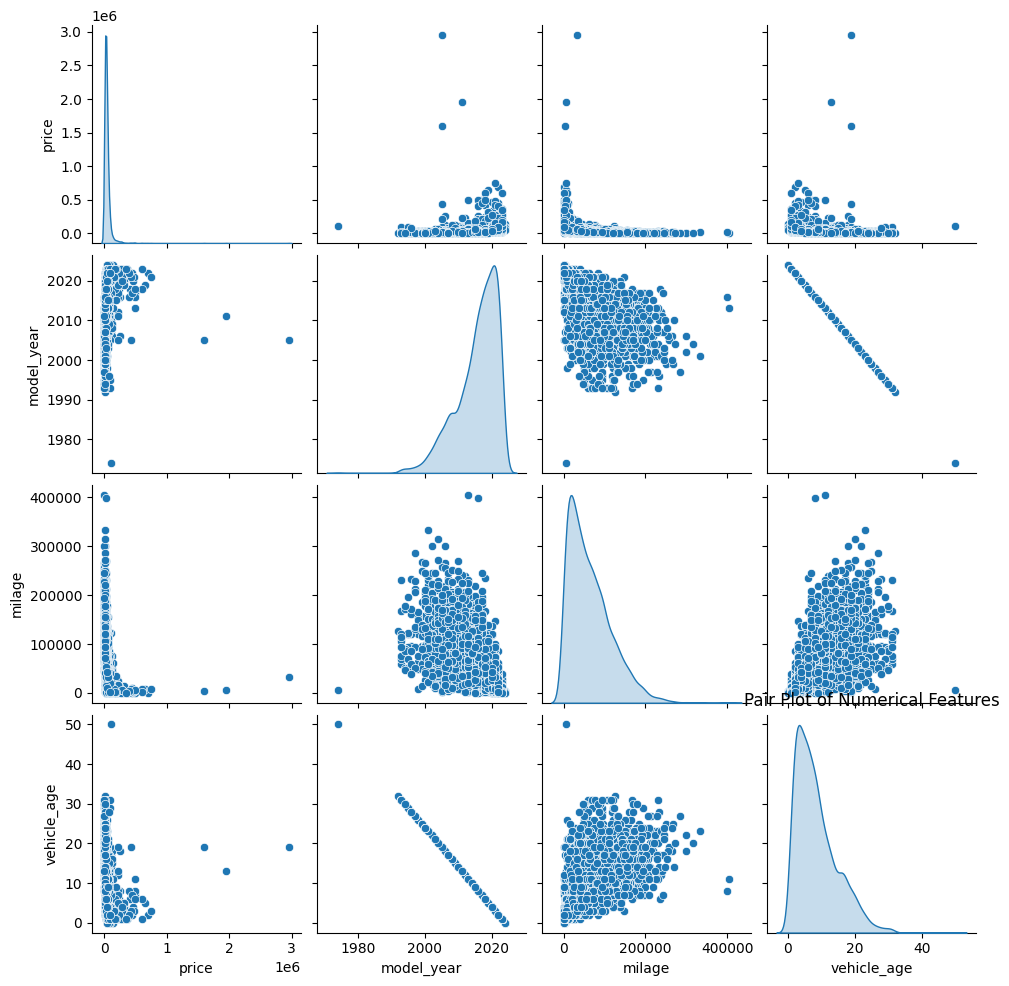

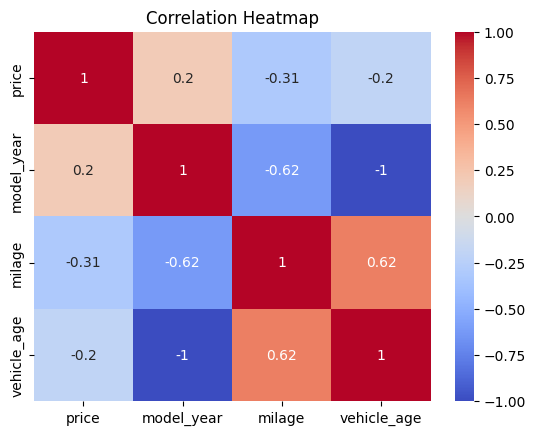

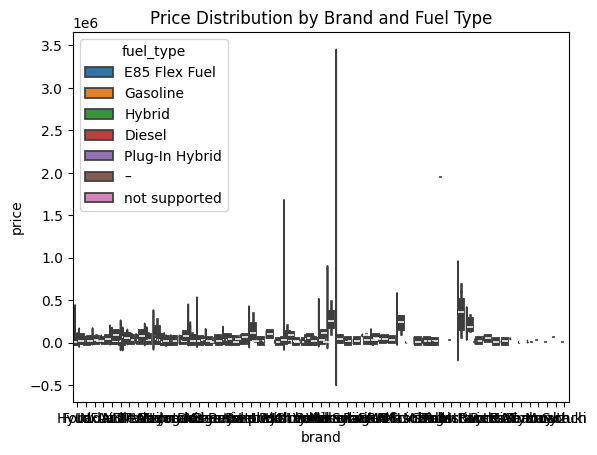

In [76]:
# Pair Plot
sns.pairplot(df[['price', 'model_year', 'milage', 'vehicle_age']], diag_kind='kde')
plt.title('Pair Plot of Numerical Features')
plt.show()

# Correlation Heatmap
correlation_matrix = df[['price', 'model_year', 'milage', 'vehicle_age']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Violin Plot
sns.violinplot(x='brand', y='price', hue='fuel_type', data=df, split=True)
plt.title('Price Distribution by Brand and Fuel Type')
plt.show()

In [77]:
# Assuming df is your final DataFrame after preprocessing and feature engineering
df.to_csv('data/preprocessed_data.csv', index=False)

#### Conclusions

1) Brand and Model Year Impact: The value of a car is significantly influenced by its brand and model year. High-end brands and newer models generally fetch higher prices.

2) Mileage Correlation: There is a negative correlation between mileage and car price. Cars with higher mileage tend to have lower prices due to increased wear and tear.

3) Accident History and Clean Title: Accident history and clean title status are critical factors. Cars with no accident history and a clean title are valued higher.

4) Fuel Type Variation: Different fuel types impact car prices. Gasoline cars have a wide range of prices, while other fuel types, such as hybrids and electric cars, show varying price distributions.

5) Vehicle Age Influence: Older vehicles tend to be cheaper, while newer vehicles, represented by a lower vehicle age, are more expensive.

6) Feature Engineering Benefits: Interaction features between brand, model year, mileage, and fuel type help capture complex relationships, improving the model's predictive accuracy.

7) Log-Price Transformation: Transforming the price to its logarithm reduces skewness and helps in achieving better model performance.

In [253]:
import pandas as pd

# Load the actual dataset
df = pd.read_csv('data/preprocessed_data.csv')

# Display the first few rows to confirm data is loaded correctly
# print(df.head())

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Features:", numerical_features)

# Select categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Features:", categorical_features)


Numerical Features: ['model_year', 'milage', 'price', 'clean_title_missing', 'vehicle_age', 'log_price', 'model_year_milage']
Categorical Features: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'milage_bin', 'brand_model', 'brand_model_year', 'brand_milage', 'fuel_type_milage', 'brand_clean_title_missing', 'fuel_type_clean_title_missing', 'accident_clean_title_missing', 'brand_fuel_type', 'accident_clean_title']
